In [1]:
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import json

In [2]:
test_image = Image.open("example.jpg")

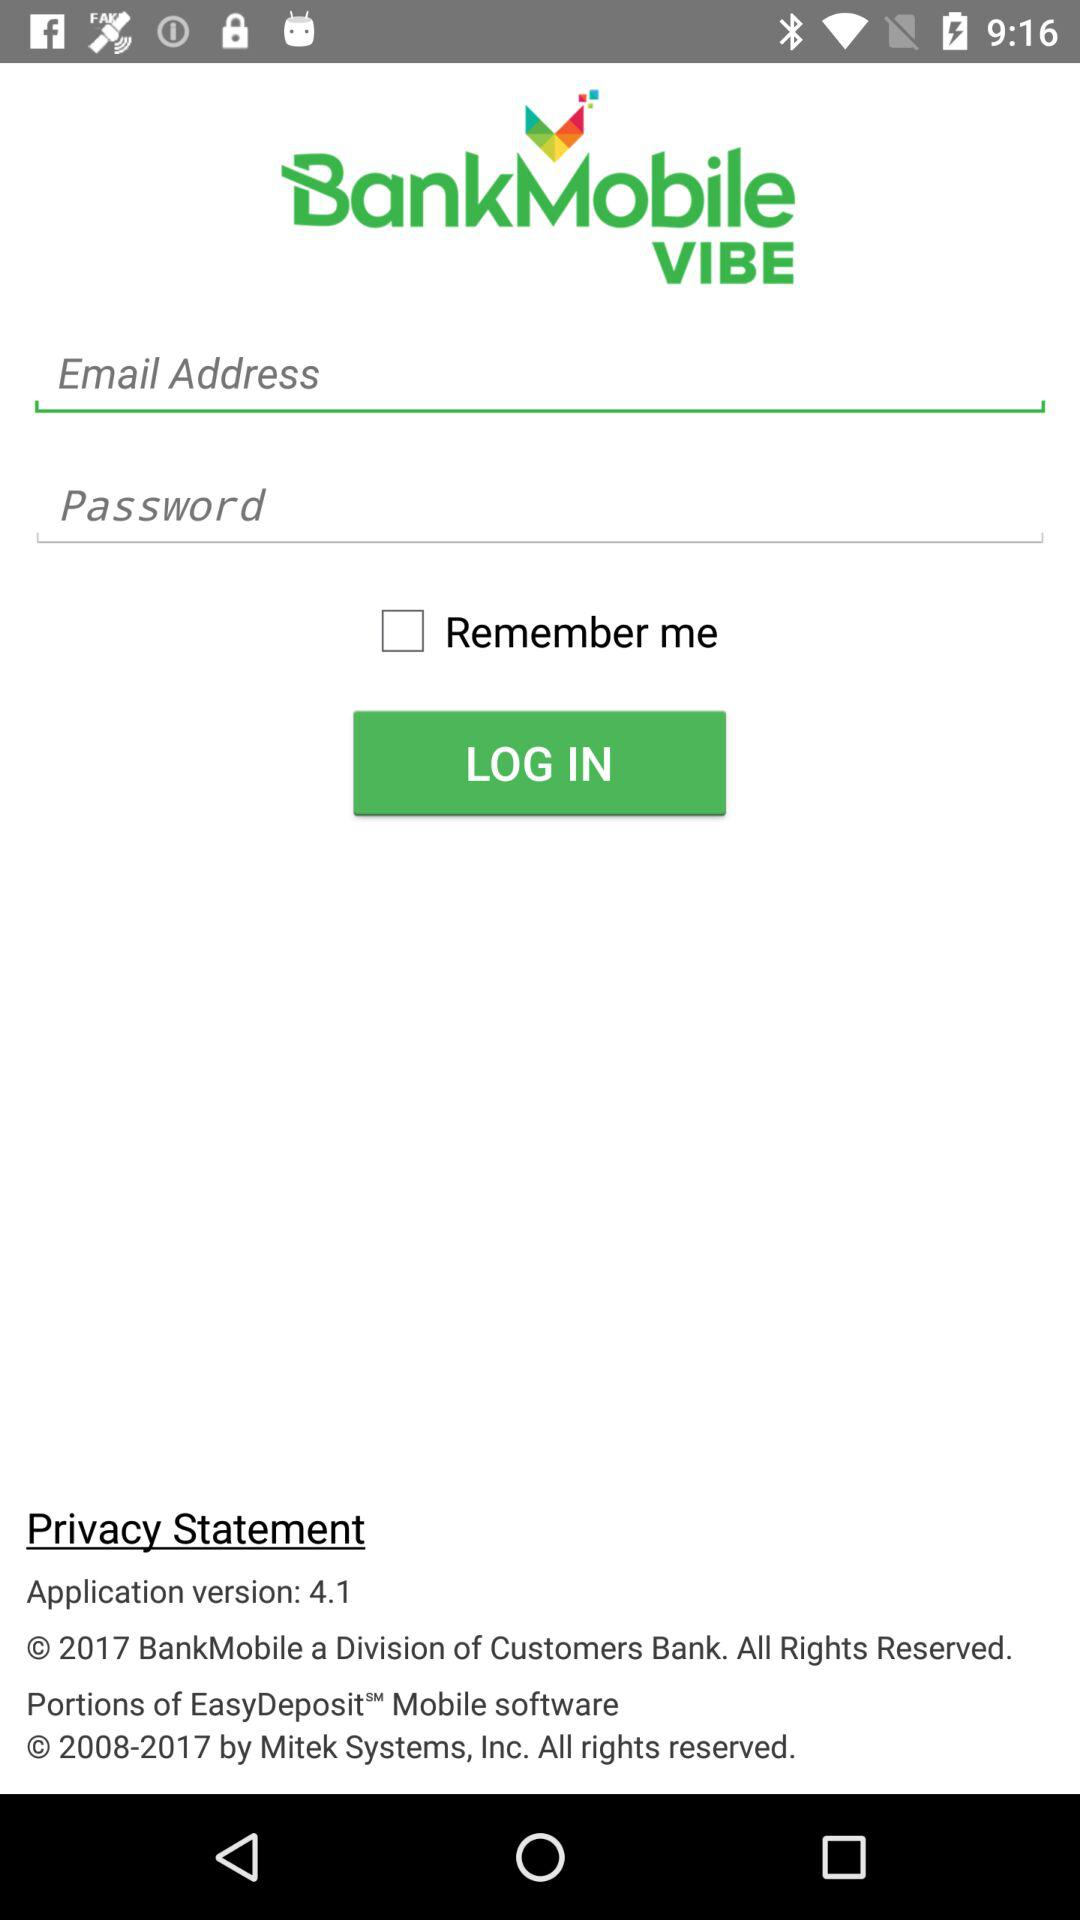

In [3]:
test_image

In [4]:
m = torch.jit.load("../downloads/checkpoints/screenclassification-resnet-noisystudent+web350k.torchscript")

In [5]:
img_transforms = transforms.Compose([
    transforms.Resize(128), # resizes so that the smallest edge is 128
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
class_map_file = "../metadata/screenclassification/class_map_enrico.json"
with open(class_map_file, "r") as f:
    class_map = json.load(f)
    
idx2Label = class_map['idx2Label']

In [7]:
idx2Label

{'0': 'bare',
 '1': 'calculator',
 '2': 'camera',
 '3': 'chat',
 '4': 'editor',
 '5': 'form',
 '6': 'gallery',
 '7': 'list',
 '8': 'login',
 '9': 'maps',
 '10': 'mediaplayer',
 '11': 'menu',
 '12': 'modal',
 '13': 'news',
 '14': 'other',
 '15': 'profile',
 '16': 'search',
 '17': 'settings',
 '18': 'terms',
 '19': 'tutorial'}

In [8]:
img_input = img_transforms(test_image)

In [9]:
pred = m(img_input.unsqueeze(0))

In [10]:
conf = F.softmax(pred, dim=-1)

In [11]:
_, ind = pred.max(dim=-1)

In [12]:
print("prediction:", idx2Label[str(int(ind))])
print("conf:", conf[0][ind])

prediction: login
conf: tensor([0.5995], grad_fn=<IndexBackward0>)
